In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Анализ e-learning 4 базы данных.

# assessments.csv — этот файл содержит информацию об оценках в тесте. 
#     Обычно каждый предмет в семестре включает ряд тестов с оценками, 
#     за которыми следует заключительный экзаменационный тест (экзамен).

#       code_module — идентификационный код предмета.
#       code_presentation — семестр (Идентификационный код).
#       id_assessment — тест (Идентификационный номер ассессмента).
#       assessment_type — тип теста. Существуют три типа оценивания: 
#                         оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).
#       date — информация об окончательной дате сдачи теста. 
#               Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).
#       weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; 
#                   сумма всех остальных оценок составляет 100%.

# courses.csv — файл содержит список предметов по семестрам.

#       code_module — предмет (идентификационный код).
#       code_presentation — семестр (идентификационный код).
#       module_presentation_length — продолжительность семестра в днях.

# studentAssessment.csv — этот файл содержит результаты тестов студентов. 
#                         Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.
#       id_assessment — тест (идентификационный номер).
#       id_student — идентификационный номер студента.
#       date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.
#       is_banked — факт перезачета теста с прошлого семестра 
#                  (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).
#       score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. 
#               Оценка ниже 40 неудачная/неуспешная сдача теста.

# studentRegistration.csv — этот файл содержит информацию о времени, 
#                           когда студент зарегистрировался для прохождения курса в семестре.
#       code_module — предмет (идентификационный код).
#       code_presentation — семестр (идентификационный код)
#       id_student — идентификационный номер студента.
#       date_registration — дата регистрации студента. 
#                           Это количество дней, измеренное от начала семестра 
#                           (например, отрицательное значение -30 означает, 
#                           что студент зарегистрировался на прохождение курса за 30 дней до его начала).
#       date_unregistration — дата отмены регистрации студента с предмета. 
#                             У студентов, окончивших курс, это поле остается пустым.

In [3]:
# Считываем данные 
assessments = pd.read_csv('assessments.csv')

courses = pd.read_csv('courses.csv')

studentAssessment = pd.read_csv('studentAssessment.csv')

studentRegistration = pd.read_csv('studentRegistration.csv')

In [4]:
# Смотрим размер всех таблиц, их вид и описание типов данных, пропущенные значения, дубликаты

In [5]:
assessments.shape

(206, 6)

In [6]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [7]:
courses.shape

(22, 3)

In [8]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [9]:
studentAssessment.shape

(173912, 5)

In [10]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [11]:
studentRegistration.shape

(32593, 5)

In [12]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [13]:
assessments.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [14]:
courses.dtypes

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

In [15]:
studentAssessment.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

In [16]:
studentRegistration.dtypes

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

In [17]:
assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [18]:
courses.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [19]:
studentAssessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [20]:
studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [21]:
courses.duplicated(keep=False).sum()

0

In [22]:
assessments.duplicated(keep=False).sum()

0

In [23]:
studentAssessment.duplicated(keep=False).sum()

0

In [24]:
studentRegistration.duplicated(keep=False).sum()

0

In [25]:
# Выводы:
# Дубликатов данных нет.

# Есть пропущенные значения в таблицах:
#     'assessments' - в столбце с датами, некоторые экзамены не имеют срок сдачи. Возможно, такие экзамены, которые без срока. 
#     'studentAssessment' - в столбце 'score', возможно это связанно с тем, что студенты не сдавали данный экзамен или 
#                          не сдали вовсе.
#     'studentRegistration' - в столбцах 'date_registration' - возможно данные не записывались, 
#                             нужно смотреть, как повлияет это не дальнейшие исследования;
#                             'date_unregistration' - нет в данных тех студентов, которые окончили курс.


In [26]:
# 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене).

# За курс я взяла code_module — предмет (идентификационный код), так как по предмету есть зачеты, 
# которые имеют свой вес и экзамены после них. 


In [27]:
# соединим две таблица, с данными и студентам с оценкой и по экзаменам 
# Посмотрим у каких предметов студенты сдавали экзамены
studentAssessment.merge(assessments, how = 'inner', on = 'id_assessment') \
                .query('assessment_type == "Exam"').code_module.unique()

array(['CCC', 'DDD'], dtype=object)

In [28]:
# Получается, что только по двум предметам есть информация о сдаче экзаменов: 'CCC', 'DDD' 
# Проверим в таблице assessments, есть ли вообще экзамены по другим предметам:
assessments.query('assessment_type == "Exam"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [29]:
# Получается, что у всех предметов есть экзамен, либо, все студенты не сдавали этот экзамен (что мало вероятно), 
# либо данные по данным предметам не вносятся в таблицу (что необходимо поправить). 
# Так же в таблице assessments есть колонка 'weight', 
# в которой указывается вес предварительных тестов до экзамена, получается, что для того, чтобы сдавать экзамен, 
# необходимо сдавать предварительные тесты и только после сдачи их всех (так что бы общий вес был 100),
# студент допускается до экзамена.

In [30]:
# отсортируем данные для дальнейшего использования, возьмем только успешные тесты (по которым оценка > = 40), 
# и посчитаем по общий вес всех успешно сданных тестов

test = studentAssessment.merge(assessments, how = 'inner', on = 'id_assessment') \
                        .query('score >= 40.0') \
                        .groupby(['id_student', 'code_presentation', 'code_module', 'assessment_type'], as_index = False) \
                        .agg({'weight': 'sum'})
test

,id_student,code_presentation,code_module,assessment_type,weight
0,6516,2014J,AAA,TMA,100.0
1,8462,2013J,DDD,TMA,40.0
2,8462,2014J,DDD,TMA,50.0
3,11391,2013J,AAA,TMA,100.0
4,23629,2013B,BBB,CMA,2.0
...,...,...,...,...,...
43415,2698257,2013J,AAA,TMA,100.0
43416,2698535,2013J,EEE,TMA,72.0
43417,2698535,2014B,CCC,CMA,7.0
43418,2698577,2014J,BBB,TMA,100.0


In [31]:
# Развернем таблицу, для того что бы удобно было с ней работать дальше и сразу отфильтруем только те строки где Exam = 100
test_pivot = test.pivot(index=['id_student', 'code_presentation', 'code_module'], columns='assessment_type', values='weight') \
                 .fillna(0) \
                 .query('Exam == 100') \
                 .reset_index()
test_pivot.head()

assessment_type,id_student,code_presentation,code_module,CMA,Exam,TMA
0,23698,2014J,CCC,25.0,100.0,75.0
1,24213,2014B,DDD,0.0,100.0,100.0
2,27116,2014J,CCC,25.0,100.0,75.0
3,28046,2013J,DDD,0.0,100.0,80.0
4,28787,2014J,CCC,17.0,100.0,0.0


In [32]:
#добавим колонку с суммой по тестам по СМА и ТНА
test_pivot['SUM_CMA_TMA'] = test_pivot['CMA'] + test_pivot['TMA']
test_pivot.head()

assessment_type,id_student,code_presentation,code_module,CMA,Exam,TMA,SUM_CMA_TMA
0,23698,2014J,CCC,25.0,100.0,75.0,100.0
1,24213,2014B,DDD,0.0,100.0,100.0,100.0
2,27116,2014J,CCC,25.0,100.0,75.0,100.0
3,28046,2013J,DDD,0.0,100.0,80.0,80.0
4,28787,2014J,CCC,17.0,100.0,0.0,17.0


In [33]:
test_pivot.query('SUM_CMA_TMA != 100') # это те студенты, которые не сдали на 100% курс, но сдали экзамен

assessment_type,id_student,code_presentation,code_module,CMA,Exam,TMA,SUM_CMA_TMA
3,28046,2013J,DDD,0.0,100.0,80.0,80.0
4,28787,2014J,CCC,17.0,100.0,0.0,17.0
6,29420,2014J,CCC,25.0,100.0,66.0,91.0
14,33930,2013J,DDD,0.0,100.0,80.0,80.0
15,35508,2014J,CCC,25.0,100.0,0.0,25.0
...,...,...,...,...,...,...,...
4381,2691267,2014J,CCC,25.0,100.0,53.0,78.0
4382,2692186,2013J,DDD,0.0,100.0,80.0,80.0
4385,2692948,2014B,DDD,0.0,100.0,77.5,77.5
4390,2697181,2014B,CCC,17.0,100.0,44.0,61.0


In [34]:
test_pivot.query('SUM_CMA_TMA == 0') # эти ребята вообще не сдали ничего по курсу, но сдали экзамен.

assessment_type,id_student,code_presentation,code_module,CMA,Exam,TMA,SUM_CMA_TMA
280,245946,2013J,DDD,0.0,100.0,0.0,0.0
507,363122,2014B,DDD,0.0,100.0,0.0,0.0
2523,607110,2014J,DDD,0.0,100.0,0.0,0.0
2780,623008,2014B,DDD,0.0,100.0,0.0,0.0


In [35]:
test_pivot.query('SUM_CMA_TMA == 100') #полностью закончили программу курса и сдали успешно после этого экзамен.

assessment_type,id_student,code_presentation,code_module,CMA,Exam,TMA,SUM_CMA_TMA
0,23698,2014J,CCC,25.0,100.0,75.0,100.0
1,24213,2014B,DDD,0.0,100.0,100.0,100.0
2,27116,2014J,CCC,25.0,100.0,75.0,100.0
5,29411,2013J,DDD,0.0,100.0,100.0,100.0
7,29639,2014J,CCC,25.0,100.0,75.0,100.0
...,...,...,...,...,...,...,...
4384,2692577,2014B,DDD,0.0,100.0,100.0,100.0
4386,2693243,2013B,DDD,25.0,100.0,75.0,100.0
4387,2694886,2014B,DDD,0.0,100.0,100.0,100.0
4388,2694933,2013B,DDD,25.0,100.0,75.0,100.0


In [36]:
# теперь посчитаем тех, кто полностью закончил программу курса  успешно сдал только один курс.
print('Студентов, кто полностью закончил курс и успешно сдали только один курс - ', 
          test_pivot.query('SUM_CMA_TMA == 100')
                    .groupby('id_student', as_index = False) \
                    .agg({'code_presentation': 'count'}) \
                    .query('code_presentation == 1') \
                    .code_presentation.sum())

Студентов, кто полностью закончил курс и успешно сдали только один курс -  2336


In [37]:
# Но с другой стороны, в условии не говориться, есть ли необходимость проходить весь курс со сдачей всех тестов, 
# или будет достаточно сдать только экзамен и получить сертификат по курсу.
# В случае, когда не обязательно проходить весь курс целиком, рассчитаем количество студентов, 
# которые успешно сдали экзамен только по одному курсу

In [38]:
print('Студентов, кто успешно сдал экзамен только по одиному курсу - ', 
                studentAssessment.merge(assessments, how = 'inner', on = 'id_assessment') \
                .query('assessment_type == "Exam" and score >= 40.0') \
                .groupby('id_student', as_index = False) \
                .agg({'id_assessment': 'count'}) \
                .query('id_assessment == 1') \
                .id_assessment.sum())

Студентов, кто успешно сдал экзамен только по одиному курсу -  3802


In [39]:
# Ответ 1: 

# Студентов, кто успешно сдали только один курс, при условии что нет необходимости проходить весь курс целиком - 3082.
# Студентов, кто успешно сдали только один курс, при условии что перед этим необходимо закончить весь курс -  2336


In [40]:
# 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, 
# которые обладают самой низкой и самой высокой завершаемостью*.

In [41]:
# посчитаем количество попыток по каждому экзамену
attempts_exam = studentAssessment.dropna().merge(assessments, how = 'inner', on = 'id_assessment') \
                .query('assessment_type == "Exam"') \
                .groupby(['id_assessment', 'code_module', 'code_presentation'], as_index = False) \
                .agg({'id_student': "count"}) \
                .rename(columns = {'id_student': 'attempt'})              

In [42]:
# посчитаем количество успешных сдач по каждому экзамену
success_exam = studentAssessment.dropna().merge(assessments, how = 'inner', on = 'id_assessment') \
                .query('assessment_type == "Exam" and score >= 40.0') \
                .groupby(['id_assessment', 'code_module', 'code_presentation'], as_index = False) \
                .agg({'id_student': "count"}) \
                .rename(columns = {'id_student': 'success'})

In [43]:
#собираем все в одну таблицу и сортируем по завершённости
compleat_exam = attempts_exam.merge(success_exam, how = 'inner', on = ['id_assessment', 'code_module', 'code_presentation']) \
                .assign(compleat = success_exam.success / attempts_exam.attempt) \
                .sort_values('compleat')
compleat_exam

,id_assessment,code_module,code_presentation,attempt,success,compleat
2,25340,DDD,2013B,602,504,0.837209
1,24299,CCC,2014J,1168,1019,0.872432
5,25368,DDD,2014J,950,842,0.886316
0,24290,CCC,2014B,747,664,0.888889
3,25354,DDD,2013J,968,878,0.907025
4,25361,DDD,2014B,524,485,0.925573


In [44]:
# Ответ 2:
# Самый сложный экзамен по предмету DDD Экзамен № 25340 в семестре 2013B
# Самый простой экзамен так же по предмету DDD Экзамен № 25361 в семестре 2014B

In [45]:
# P.S.

In [46]:
compleat_exam.sort_values('code_module')
# когда смотришь на эту таблицу, складывается впечатление, 
# что code_module (они же предметы, они же курсы) повторяются из семестра в семестр, отсюда просится вывод, 
# что это один и тот же экзамен, просто с разными кодами в разные семестры.
# из-за отсутствия возможности получить больше информации о продукте, остаётся строить лишь предположения:)
# попробуем просуммировать результаты по курсам и посчитать завершаемость. 

,id_assessment,code_module,code_presentation,attempt,success,compleat
1,24299,CCC,2014J,1168,1019,0.872432
0,24290,CCC,2014B,747,664,0.888889
2,25340,DDD,2013B,602,504,0.837209
5,25368,DDD,2014J,950,842,0.886316
3,25354,DDD,2013J,968,878,0.907025
4,25361,DDD,2014B,524,485,0.925573


In [47]:
compleat_exam_modul = attempts_exam.merge(success_exam, how = 'inner', 
                                          on = ['id_assessment', 'code_module', 'code_presentation']) \
                                   .groupby('code_module', as_index = False) \
                                   .agg({'attempt': 'sum', 'success': 'sum'})

compleat_exam_modul['compleat'] = compleat_exam_modul['success'] / compleat_exam_modul['attempt']

compleat_exam_modul # Из этой таблицы можно сделать вывод, что по курсу CCC завершаемость чуть-чуть ниже чем по курсу DDD.

,code_module,attempt,success,compleat
0,CCC,1915,1683,0.878851
1,DDD,3044,2709,0.889947


In [48]:
# 3. По каждому предмету определи средний срок сдачи экзаменов 
# (под сдачей понимаем последнее успешное прохождение экзамена студентом)

In [49]:
# проверим, нет ли студентов, которые два раза сдавали один и тот же экзамен

In [50]:
studentAssessment.merge(assessments, how = 'inner', on = 'id_assessment') \
                .query('score > 40 and assessment_type == "Exam"') \
                .groupby(['id_student', 'id_assessment'], as_index = False) \
                .agg({'assessment_type': 'count'}) \
                .sort_values('assessment_type') \
                .query('assessment_type != 1') \
                .assessment_type.count()
# нет одинаковых сочeтаний

0

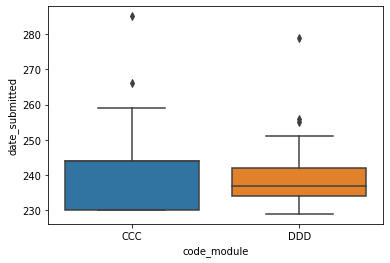

In [51]:
# построим boxplot что бы посмотреть распределение данных
success_st = studentAssessment.merge(assessments, how = 'inner', on = 'id_assessment') \
                .query('score > 40 and assessment_type == "Exam"')
sns.boxplot(x="code_module", y="date_submitted", data=success_st)

# видно что распределение по предмету ССС очень смещено, по-моему, использование среднего тут не очень уместно.  

In [52]:
# тем неимение считаем среднее для обоих предметов
studentAssessment.merge(assessments, how = 'inner', on = 'id_assessment') \
                 .query('score > 40 and assessment_type == "Exam"') \
                 .groupby('code_module', as_index = False) \
                 .agg({'date_submitted': 'mean'}) \
                 .round(0)

,code_module,date_submitted
0,CCC,239.0
1,DDD,238.0


In [53]:
# также посмотрим сильно ли отличается медиана. 

In [54]:
studentAssessment.merge(assessments, how = 'inner', on = 'id_assessment') \
                 .query('score > 40 and assessment_type == "Exam"') \
                 .groupby('code_module', as_index = False) \
                 .agg({'date_submitted': 'median'})
# по предмету ССС медиана очень отличается, это мы и увидели на графике

,code_module,date_submitted
0,CCC,244
1,DDD,237


In [55]:
# так же посмотрим моду для данных по предмету ССС 
studentAssessment.merge(assessments, how = 'inner', on = 'id_assessment') \
                 .query('score > 40 and assessment_type == "Exam" and code_module == "CCC"') \
                 .date_submitted.mode()
# мода и медиана ровны

0    244
dtype: int64

In [56]:
# Ответ 3: Все же возьмем за среднее данные по медиане, они лучше отражают структуру данных
# Среднее время (медиана) сдачи экзамена по предмету ССС - 244, DDD - 237. 

In [57]:
# 4. Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. 
# А также курсы с самым большим оттоком (ТОП-3). (8 баллов)

In [58]:
#считаем курсы по количеству регистраций
popular_course = studentRegistration.groupby('code_module', as_index = False) \
                                    .agg({'date_registration': 'count'}) \
                                    .sort_values('date_registration', ascending = False)
popular_course.head(3) # ТОП-3 по количеству регистраций

,code_module,date_registration
1,BBB,7900
5,FFF,7751
3,DDD,6257


In [59]:
#считаем количество ушедших с курса
unpopular_course = studentRegistration.groupby('code_module', as_index = False) \
                                      .agg({'date_unregistration': 'count'}) \
                                      .sort_values('date_unregistration', ascending = False)
unpopular_course

,code_module,date_unregistration
5,FFF,2380
1,BBB,2377
3,DDD,2235
2,CCC,1947
4,EEE,718
6,GGG,289
0,AAA,126


In [60]:
# Оценить отток по курсу нельзя просто количеством ушедших, эта пустая цифра, она ничего нам не объясняет, 
# необходимо считать в процентах, ушедших от зарегистрированных, поэтому объединим датафреймы и посчитаем процент

percent_unreg = popular_course.merge(unpopular_course, how = 'inner', on = 'code_module')

percent_unreg['per_unreg'] = ((percent_unreg['date_unregistration'] / percent_unreg['date_registration']) * 100).round(0)

percent_unreg.sort_values('per_unreg', ascending = False).head(3) # ТОП 3 курсы с самым большим оттоком

,code_module,date_registration,date_unregistration,per_unreg
3,CCC,4426,1947,44.0
2,DDD,6257,2235,36.0
1,FFF,7751,2380,31.0


In [61]:
# Ответ 4:
    
# ТОП 3 самых популярный курсов по количеству регистраций на них:
    
# BBB - 7900
# FFF - 7751
# DDD - 6257

# ТОП 3 курсы с самым большим оттоком:
    
# ССС - 44 %
# DDD - 36 %
# FFF - 31 %

# видим что курсы пересекаются в ТОПах,
# что происходит после регистрации, почему люди уходят, необходимо разбираться.
# Либо неправильно настроена реклама, привлекает не тех учеников, либо что-то с программой самих курсов. 

In [61]:
# 5. Построй когортный (семестровый) анализ. 
# В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов 
# и самыми долгими средними сроками сдачи курсов.

In [62]:
# выявим семестр с самой низкой завершаемостью курсов, за когорты возьмем предметы(курсы)

# посчитаем количество студентов которые пытались сдать экзамен
course_attempts = studentAssessment.dropna() \
                                   .merge(assessments, how = 'inner', on = 'id_assessment') \
                                   .query('assessment_type == "Exam"') \
                                   .groupby(['code_presentation', 'code_module'], as_index = False) \
                                   .agg({'id_student': "count"}) \
                                   .rename(columns = {'id_student': 'attempt'})

# посчитаем количество студентов которые сдали экзамен успешно
success_course = studentAssessment.dropna() \
                                  .merge(assessments, how = 'inner', on = 'id_assessment') \
                                  .query('assessment_type == "Exam" and score >= 40.0') \
                                  .groupby(['code_presentation', 'code_module'], as_index = False) \
                                  .agg({'id_student': "count"}) \
                                  .rename(columns = {'id_student': 'success'})

In [63]:
# соединим два предыдущих датафрейма
compleat_course = course_attempts.merge(success_course, how = 'inner', on = ['code_presentation', 'code_module']) \
                                 .assign(compleat = (success_course.success / course_attempts.attempt)* 100) \
                                 .round(2) \
                                 .sort_values('code_presentation') \
                                 .drop(['attempt', 'success'], axis=1)

compleat_course

,code_presentation,code_module,compleat
0,2013B,DDD,83.72
1,2013J,DDD,90.70
2,2014B,CCC,88.89
3,2014B,DDD,92.56
4,2014J,CCC,87.24
5,2014J,DDD,88.63


In [64]:
# теперь сделаем табличку, для лучшего визуального восприятия цифр :)

cohort_pivot = compleat_course.pivot_table(index='code_module', columns='code_presentation', values='compleat') \
                              .sort_values('code_module', ascending = False)

cohort_pivot.columns.name = None

cohort_pivot =  cohort_pivot.reset_index() \
                            .append(cohort_pivot.mean(numeric_only=True), ignore_index=True) \
                            .fillna(0)
# посчитаем среднюю завершаемость по каждому семестру
cohort_pivot['code_module'] = cohort_pivot.code_module.replace(0,'total_mean')

cohort_pivot

,code_module,2013B,2013J,2014B,2014J
0,DDD,83.72,90.7,92.560,88.630
1,CCC,0.00,0.0,88.890,87.240
2,total_mean,83.72,90.7,90.725,87.935


In [65]:
# Вывод: Видно, что экзаменов по предмету CCC не было в 2013  году, 
#        поэтому завершаемость мы можем рассматривать только по предмету DDD в 2013 году.

#        В 2014 году появился еще один предмет с экзаменом.  
#        Самая низкая заверщаемость получилась в сeместре 2013B

In [66]:
# теперь выявим семестр с самыми долгими средними сроками сдачи курсов
# сгруппируем по предметам(это и будут когорты) и по семестрам и посчитаем среднее
mean = studentAssessment.merge(assessments, how = 'inner', on = 'id_assessment') \
                .query('assessment_type == "Exam"') \
                .groupby(['code_module', 'code_presentation'], as_index = False) \
                .agg({'date_submitted': 'mean'}) \
                .rename(columns = {'date_submitted': 'mean'}) \
                .round(2)
mean

,code_module,code_presentation,mean
0,CCC,2014B,231.62
1,CCC,2014J,244.39
2,DDD,2013B,230.18
3,DDD,2013J,239.51
4,DDD,2014B,234.94
5,DDD,2014J,242.79


In [67]:
# опять стоим табличку для лучшего понимания
cohort_mean = mean.pivot_table(index='code_module', columns='code_presentation', values='mean') \
                              .sort_values('code_module', ascending = False)

cohort_mean.columns.name = None

cohort_mean =  cohort_mean.reset_index() \
                          .append(cohort_mean.mean(numeric_only=True), ignore_index=True) \
                          .fillna(0)
# считаем среднее по сроку сдачи
cohort_mean['code_module'] = cohort_mean.code_module.replace(0,'total_mean')

cohort_mean

,code_module,2013B,2013J,2014B,2014J
0,DDD,230.18,239.51,234.94,242.79
1,CCC,0.00,0.00,231.62,244.39
2,total_mean,230.18,239.51,233.28,243.59


In [69]:
# Вывод: Семестр с самыми долгими средними сроками сдачи курсов - 2014J

In [68]:
# Ответ 5:  Самая низкая заверщаемость получилась в сeместре 2013B
#           Семестр с самыми долгими средними сроками сдачи курсов - 2014J

In [69]:
# 6. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. 
# В адаптированной кластеризации используй следующие метрики: 
#     R - среднее время сдачи одного экзамена, 
#     F - завершаемость курсов, 
#     M - среднее количество баллов, получаемое за экзамен. 

In [70]:
# Для анализа RFM сгруппируем наши данные и возьмем только тех студентов, которые сдавали экзамен по курсу.
df_for_RFM = studentAssessment.merge(assessments, how = 'inner', on = 'id_assessment') \
                       .query('assessment_type == "Exam"') \
                       .groupby(['id_student', 'date_submitted','score'], as_index = False) \
                       .agg({'date_submitted': 'mean', 'score': 'mean'})

count    4959.000000
mean      238.483565
std         5.717577
min       229.000000
25%       234.000000
50%       241.000000
75%       243.000000
max       285.000000
Name: date_submitted, dtype: float64

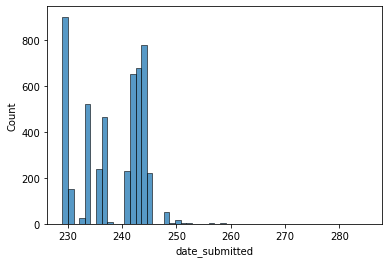

In [71]:
# для значения R (среднее время сдачи проекта), посмотрим распределение данных и описание.
# оценив данные определимся с границами метрики:
# 1 - меньше 234 (взяла это значение 25%)
# 2 - от 234 до 241 (до среднего)
# 3 - больше 241 (те студенты, которые потратили времени больше среднего)  

sns.histplot(x = 'date_submitted', data = df_for_RFM )
df_for_RFM.date_submitted.describe()

count    4959.000000
mean       65.572898
std        20.579186
min         0.000000
25%        51.000000
50%        67.000000
75%        82.000000
max       100.000000
Name: score, dtype: float64

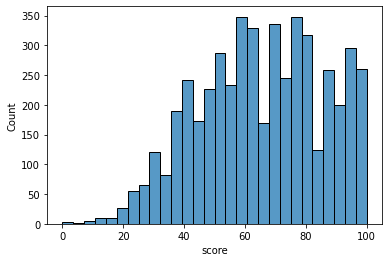

In [72]:
# для значения М (среднее количество баллов полученное за экзамен), посмотрим распределение данных и описание.
# оценив данные определимся с границами метрики:
# 1 - меньше 51 (взяла это так же значение 25%)
# 2 - от 51 до 67 (до среднего)
# 3 - больше 67 (те студенты, которые получили больше всего баллов) 

sns.histplot(x = 'score', data = df_for_RFM )
df_for_RFM.score.describe()

In [73]:
# для значения F (завершаемость курса) определимся с границами метрики:
# 0 - до 40 баллов (не завершил)
# 2 - 40 и более (завершил)

In [74]:
# Составим формулы для подсчет метрик R и M:

def R (df):
    
    if df['date_submitted'] <= 234:
        return '1'
    elif 241 >= df['date_submitted'] > 234:
        return '2'
    elif df['date_submitted'] > 241:
        return '3'

def M (df):
    
    if df['score'] < 51:
        return '1'
    elif 67 >= df['score'] >= 51:
        return '2'
    elif df['score'] > 67:
        return '3'

In [75]:
df_for_RFM['R'] = df_for_RFM.apply(R, axis = 1) # создаем колонку с метрикой R

In [76]:
df_for_RFM['F'] = ['1' if x >= 40 else '0' for x in df_for_RFM['score']] # создаем колонку с метрикой F

In [77]:
df_for_RFM['M'] = df_for_RFM.apply(M, axis = 1) # создаем колонку с метрикой M

In [78]:
df_for_RFM['RFM_score'] = df_for_RFM['R'] + df_for_RFM['F'] + df_for_RFM['M'] # создаем колонку с метрикой RFM

In [79]:
df_for_RFM

,id_student,date_submitted,score,R,F,M,RFM_score
0,23698,243,80.0,3,1,3,313
1,24213,236,58.0,2,1,2,212
2,27116,243,96.0,3,1,3,313
3,28046,237,40.0,2,1,1,211
4,28787,243,44.0,3,1,1,311
...,...,...,...,...,...,...,...
4954,2694886,236,69.0,2,1,3,213
4955,2694933,230,73.0,1,1,3,113
4956,2695608,237,73.0,2,1,3,213
4957,2697181,230,80.0,1,1,3,113


<Figure size 1440x1280 with 0 Axes>

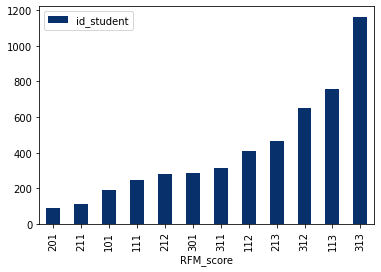

In [80]:
# Теперь составим график, что бы посмотреть каких студентов больше всего

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
df_for_RFM.groupby('RFM_score').agg({'id_student': 'count'}).sort_values('id_student').plot(kind='bar', colormap='Blues_r')
plt.show()

In [81]:
# Выводы:
#     Больше всего студентов которые долго сдавали экзамен, сдали его, и имеют высоки оценки.
#     За ними следуют студенты, которые потратили времени меньше среднего, сдали экзамен и при этом получили высокие оценки.
#     Доля студентов, которые не сдали экзамен значительно мала, в отличии от тех, кто с ним справился. 